<a href="https://colab.research.google.com/github/aggarwal-aditya/contrastive-predictive-coding/blob/master/Layered_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sys import prefix
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import gzip
import shutil
import os
import seaborn as sns
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from scipy.fftpack import fft


In [4]:
file_names="/content/drive/MyDrive/00147_batched.pkl.gz"
with gzip.open(file_names, 'rb') as f_in:
  with open(file_names[:-3], 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)


In [5]:
data = np.load("/content/drive/MyDrive/00147_batched.pkl", allow_pickle=True)

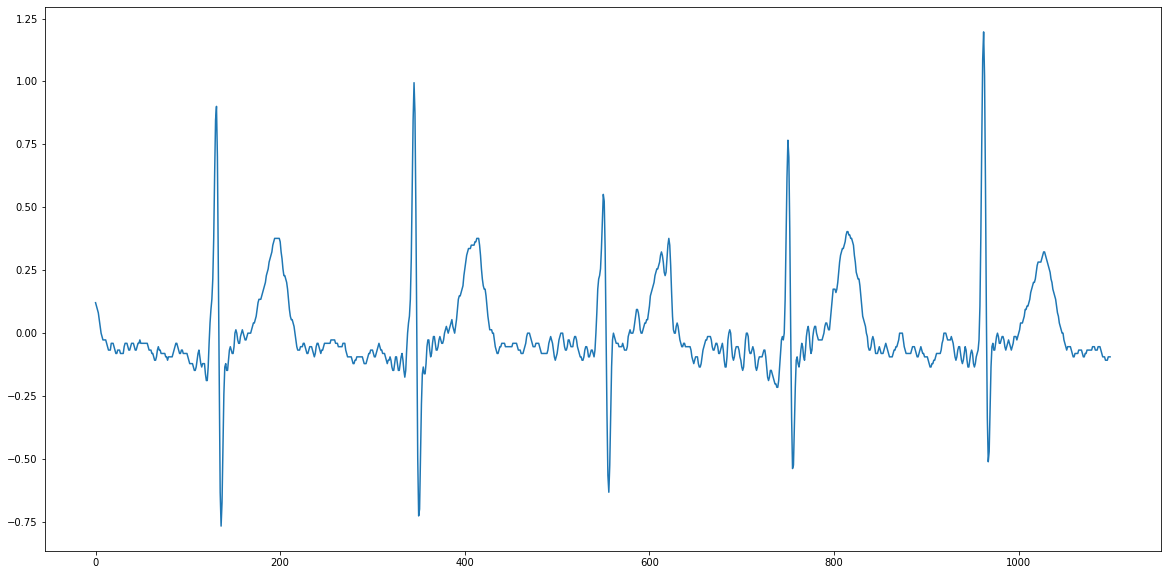

<Figure size 1440x720 with 0 Axes>

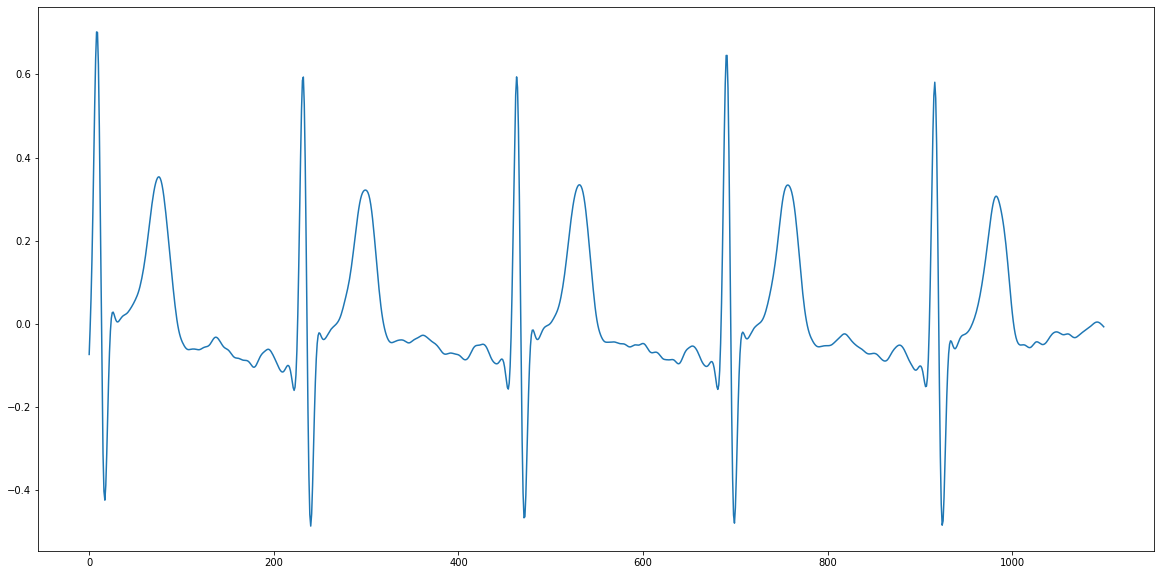

In [6]:
# An example of filtering 
!pip install heartpy
import heartpy as hp
import matplotlib
import numpy as np
# filtered = hp.filter_signal(data[15][900:2000], cutoff = [0.75, 20], sample_rate = 250.0, order = 3, filtertype='bandpass')
# # smooth=hp.smooth_signal(data[2][900:2000], sample_rate = 250, polyorder=2)
# matplotlib.rc('figure', figsize=(20, 10))
# plt.figure()
# plt.plot(data[2][900:2000])
# plt.figure()

# plt.figure()
# plt.plot(filtered)
def filter_bandpass(signal):
  filtered=hp.filter_signal(signal, cutoff = [0.75, 20], sample_rate = 250.0, order = 3, filtertype='bandpass')
  return filtered

# W is the window size
def moving_average(signal,w):
    return np.convolve(signal, np.ones(w), 'same') / w

## No Filter Approach

In [8]:
X_train=[]
context=2000
Y_train=[]
for i in range(context,10000):
  X_train.append(data[0][i-context:i])
  Y_train.append(data[0][i])
X_train=np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))


In [17]:
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh',return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredLogarithmicError(),tf.keras.metrics.LogCoshError()])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 2000, 300)         362400    
                                                                 
 dropout_10 (Dropout)        (None, 2000, 300)         0         
                                                                 
 lstm_16 (LSTM)              (None, 2000, 100)         160400    
                                                                 
 dropout_11 (Dropout)        (None, 2000, 100)         0         
                                                                 
 lstm_17 (LSTM)              (None, 2000, 50)          30200     
                                                                 
 dense_5 (Dense)             (None, 2000, 1)           51        
                                                                 
Total params: 553,051
Trainable params: 553,051
Non-tr

In [18]:
model.fit(X_train,Y_train,epochs=5,batch_size=128)
model.save("/content/drive/MyDrive/latest.h5")

Epoch 1/10
63/63 [==============================] - 45s 644ms/step - loss: 0.0275 - mean_absolute_percentage_error: 268394.8125 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1661 - mean_absolute_error: 0.1042 - mean_squared_logarithmic_error: 0.0136 - logcosh: 0.0129
Epoch 2/10
63/63 [==============================] - 40s 636ms/step - loss: 0.0276 - mean_absolute_percentage_error: 250198.0312 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1660 - mean_absolute_error: 0.1042 - mean_squared_logarithmic_error: 0.0136 - logcosh: 0.0129
Epoch 3/10
63/63 [==============================] - 40s 638ms/step - loss: 0.0275 - mean_absolute_percentage_error: 205227.8594 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1658 - mean_absolute_error: 0.1042 - mean_squared_logarithmic_error: 0.0136 - logcosh: 0.0129
Epoch 4/10
63/63 [==============================] - 40s 639ms/step - loss: 0.0275 - mean_absolute_percentage_error: 238351.7969 - mean_squared_error: 0.0275 - r

KeyboardInterrupt: ignored

In [19]:
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh',return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='RMSprop',loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredLogarithmicError(),tf.keras.metrics.LogCoshError()])
model.fit(X_train,Y_train,epochs=5,batch_size=128)
model.save("/content/drive/MyDrive/latest.h5")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2000, 300)         362400    
                                                                 
 dropout_12 (Dropout)        (None, 2000, 300)         0         
                                                                 
 lstm_19 (LSTM)              (None, 2000, 100)         160400    
                                                                 
 dropout_13 (Dropout)        (None, 2000, 100)         0         
                                                                 
 lstm_20 (LSTM)              (None, 2000, 50)          30200     
                                                                 
 dense_6 (Dense)             (None, 2000, 1)           51        
                                                                 
Total params: 553,051
Trainable params: 553,051
Non-tr

KeyboardInterrupt: ignored

In [20]:
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh',return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='Adadelta',loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredLogarithmicError(),tf.keras.metrics.LogCoshError()])
model.fit(X_train,Y_train,epochs=5,batch_size=128)
model.save("/content/drive/MyDrive/latest.h5")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 2000, 300)         362400    
                                                                 
 dropout_14 (Dropout)        (None, 2000, 300)         0         
                                                                 
 lstm_22 (LSTM)              (None, 2000, 100)         160400    
                                                                 
 dropout_15 (Dropout)        (None, 2000, 100)         0         
                                                                 
 lstm_23 (LSTM)              (None, 2000, 50)          30200     
                                                                 
 dense_7 (Dense)             (None, 2000, 1)           51        
                                                                 
Total params: 553,051
Trainable params: 553,051
Non-tr

In [21]:
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh',return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='Adagrad',loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredLogarithmicError(),tf.keras.metrics.LogCoshError()])
model.fit(X_train,Y_train,epochs=5,batch_size=128)
model.save("/content/drive/MyDrive/latest.h5")

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2000, 300)         362400    
                                                                 
 dropout_16 (Dropout)        (None, 2000, 300)         0         
                                                                 
 lstm_25 (LSTM)              (None, 2000, 100)         160400    
                                                                 
 dropout_17 (Dropout)        (None, 2000, 100)         0         
                                                                 
 lstm_26 (LSTM)              (None, 2000, 50)          30200     
                                                                 
 dense_8 (Dense)             (None, 2000, 1)           51        
                                                                 
Total params: 553,051
Trainable params: 553,051
Non-tr

In [ ]:
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh',return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='Adamax',loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredLogarithmicError(),tf.keras.metrics.LogCoshError()])
model.fit(X_train,Y_train,epochs=5,batch_size=128)
model.save("/content/drive/MyDrive/latest.h5")

In [ ]:
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh',return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='Ftrl',loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredLogarithmicError(),tf.keras.metrics.LogCoshError()])
model.fit(X_train,Y_train,epochs=5,batch_size=128)
model.save("/content/drive/MyDrive/latest.h5")

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2000, 300)         362400    
                                                                 
 dropout_20 (Dropout)        (None, 2000, 300)         0         
                                                                 
 lstm_31 (LSTM)              (None, 2000, 100)         160400    
                                                                 
 dropout_21 (Dropout)        (None, 2000, 100)         0         
                                                                 
 lstm_32 (LSTM)              (None, 2000, 50)          30200     
                                                                 
 dense_10 (Dense)            (None, 2000, 1)           51        
                                                                 
Total params: 553,051
Trainable params: 553,051
Non-t

In [22]:
model=Sequential()
model.add(LSTM(units = 300, activation='tanh',return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, activation='tanh',return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation='tanh',return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='Nadam',loss='mean_squared_error',metrics=[tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredLogarithmicError(),tf.keras.metrics.LogCoshError()])
model.fit(X_train,Y_train,epochs=5,batch_size=128)
model.save("/content/drive/MyDrive/latest.h5")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 2000, 300)         362400    
                                                                 
 dropout_18 (Dropout)        (None, 2000, 300)         0         
                                                                 
 lstm_28 (LSTM)              (None, 2000, 100)         160400    
                                                                 
 dropout_19 (Dropout)        (None, 2000, 100)         0         
                                                                 
 lstm_29 (LSTM)              (None, 2000, 50)          30200     
                                                                 
 dense_9 (Dense)             (None, 2000, 1)           51        
                                                                 
Total params: 553,051
Trainable params: 553,051
Non-tr

## BandPass Filter Approach

In [ ]:
filter_data=filter_bandpass(data[0][:100000])
X_train=[]
context=5000
Y_train=[]
for i in range(context,100000):
  X_train.append(filter_data[0][i-context:i])
  Y_train.append(filter_data[0][i])
X_train=np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))


In [ ]:
model=Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])

In [ ]:
model.fit(X_train,Y_train,epochs=1,batch_size=32)
model.save("/content/drive/MyDrive/latestfilter.h5")

##Moving Average Filter

In [ ]:
filter_data=moving_average(data[0][:100000],5)
X_train=[]
context=5000
Y_train=[]
for i in range(context,100000):
  X_train.append(filter_data[0][i-context:i])
  Y_train.append(filter_data[0][i])
X_train=np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))


In [ ]:
model=Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])

In [ ]:
model.fit(X_train,Y_train,epochs=1,batch_size=32)
model.save("/content/drive/MyDrive/latestmovedfilter.h5")

## Both Filters Combined

In [ ]:
filter_data=moving_average(data[0][:100000],5)
filter_data=filter_bandpass(filter_data)
X_train=[]
context=5000
Y_train=[]
for i in range(context,100000):
  X_train.append(filter_data[0][i-context:i])
  Y_train.append(filter_data[0][i])
X_train=np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))


In [ ]:
model=Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=["accuracy"])

In [ ]:
model.fit(X_train,Y_train,epochs=1,batch_size=32)
model.save("/content/drive/MyDrive/bothfilter.h5")